# 2025 빅콘테스트 데이터 탐색적 데이터 분석 (EDA)

## 데이터 개요
- **대상**: 신한카드 요식업종 서울 성동구 지역 영세/중소 가맹점
- **기간**: 2023년 01월 ~ 2024년 12월
- **데이터셋**:
  1. 가맹점 개요정보 (4,185건)
  2. 가맹점 월별 이용 정보 (86,590건)
  3. 가맹점 월별 이용 고객정보 (86,590건)

In [48]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

# 시각화 스타일 설정
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# pandas 옵션 설정
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# 컬럼명 한글 매핑 (전역 변수)
col_names_kr = {
    # Dataset 1
    'ENCODED_MCT': '가맹점ID',
    'MCT_BSE_AR': '가맹점 기본 주소',
    'MCT_NM': '가맹점명',
    'MCT_BRD_NUM': '가맹점 브랜드 번호',
    'MCT_SIGUNGU_NM': '가맹점 시군구명',
    'HPSN_MCT_ZCD_NM': '업종명',
    'HPSN_MCT_BZN_CD_NM': '상권명',
    'ARE_D': '개설일',
    'MCT_ME_D': '폐업일',
    
    # Dataset 2 - 구간 데이터
    'MCT_OPE_MS_CN': '가맹점 운영 개월 수',
    'RC_M1_SAA': '최근 1개월 매출액',
    'RC_M1_TO_UE_CT': '최근 1개월 총 이용 건수',
    'RC_M1_UE_CUS_CN': '최근 1개월 이용 고객 수',
    'RC_M1_AV_NP_AT': '최근 1개월 평균 순이익액',
    'APV_CE_RAT': '승인 취소 비율',
    
    # Dataset 2 - 비율 데이터
    'TA_YM': '기준년월',
    'DLV_SAA_RAT': '배달매출 비율',
    'M1_SME_RY_SAA_RAT': '동일 업종 매출액 비교',
    'M1_SME_RY_CNT_RAT': '동일 업종 이용 건수 비교',
    'M12_SME_RY_SAA_PCE_RT': '동일 업종 매출액 순위 비율',
    'M12_SME_BZN_SAA_PCE_RT': '동일 상권 매출액 순위 비율',
    'M12_SME_RY_ME_MCT_RAT': '동일 업종 해지 가맹점 비중',
    'M12_SME_BZN_ME_MCT_RAT': '동일 상권 해지 가맹점 비중',
    
    # Dataset 3 - 고객 정보
    'M12_MAL_1020_RAT': '남성 10-20대 비율',
    'M12_MAL_30_RAT': '남성 30대 비율',
    'M12_MAL_40_RAT': '남성 40대 비율',
    'M12_MAL_50_RAT': '남성 50대 비율',
    'M12_MAL_60_RAT': '남성 60대 이상 비율',
    'M12_FME_1020_RAT': '여성 10-20대 비율',
    'M12_FME_30_RAT': '여성 30대 비율',
    'M12_FME_40_RAT': '여성 40대 비율',
    'M12_FME_50_RAT': '여성 50대 비율',
    'M12_FME_60_RAT': '여성 60대 이상 비율',
    'MCT_UE_CLN_REU_RAT': '재방문 고객 비율',
    'MCT_UE_CLN_NEW_RAT': '신규 고객 비율',
    'RC_M1_SHC_RSD_UE_CLN_RAT': '거주지 고객 비율',
    'RC_M1_SHC_WP_UE_CLN_RAT': '직장 고객 비율',
    'RC_M1_SHC_FLP_UE_CLN_RAT': '유동인구 고객 비율'
}

## 1. 데이터 로드

In [49]:
# 데이터 로드 (cp949 인코딩 사용)
df1 = pd.read_csv('../data/raw/big_data_set1_f.csv', encoding='cp949')
df2 = pd.read_csv('../data/raw/big_data_set2_f.csv', encoding='cp949')
df3 = pd.read_csv('../data/raw/big_data_set3_f.csv', encoding='cp949')

print("데이터셋 로드 완료")
print(f"Dataset 1 shape: {df1.shape}")
print(f"Dataset 2 shape: {df2.shape}")
print(f"Dataset 3 shape: {df3.shape}")

데이터셋 로드 완료
Dataset 1 shape: (4185, 9)
Dataset 2 shape: (86590, 15)
Dataset 3 shape: (86590, 17)


## 2. 데이터셋 1: 가맹점 개요정보 분석

In [50]:
# 기본 정보
print("=" * 80)
print("Dataset 1: 가맹점 개요정보")
print("=" * 80)
print(f"\n데이터 shape: {df1.shape}")
print(f"\n컬럼 목록:")
df1.info()

Dataset 1: 가맹점 개요정보

데이터 shape: (4185, 9)

컬럼 목록:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ENCODED_MCT         4185 non-null   object 
 1   MCT_BSE_AR          4185 non-null   object 
 2   MCT_NM              4185 non-null   object 
 3   MCT_BRD_NUM         542 non-null    object 
 4   MCT_SIGUNGU_NM      4185 non-null   object 
 5   HPSN_MCT_ZCD_NM     4185 non-null   object 
 6   HPSN_MCT_BZN_CD_NM  3138 non-null   object 
 7   ARE_D               4185 non-null   int64  
 8   MCT_ME_D            127 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 294.4+ KB


In [51]:
# 처음 몇 행 확인
display(df1.head(10))

,ENCODED_MCT,MCT_BSE_AR,MCT_NM,MCT_BRD_NUM,MCT_SIGUNGU_NM,HPSN_MCT_ZCD_NM,HPSN_MCT_BZN_CD_NM,ARE_D,MCT_ME_D
0,16184E93D9,서울 성동구 마장동,성우**,NaN,서울 성동구,축산물,마장동,20130320,NaN
1,4D039EA8B7,서울 성동구 마장동,대보**,NaN,서울 성동구,축산물,마장동,20131122,NaN
2,0074C4990A,서울 성동구 마장동,대용**,NaN,서울 성동구,축산물,마장동,20140512,NaN
3,68308F2746,서울 성동구 마장동,통일**,NaN,서울 성동구,축산물,마장동,20151124,NaN
4,4117EDDE9C,서울 성동구 마장동,한울**,NaN,서울 성동구,축산물,마장동,20151211,NaN
5,281CA527F1,서울 성동구 마장동,대광**,NaN,서울 성동구,축산물,마장동,20170222,NaN
6,9A71D71270,서울 성동구 마장동,미림**,NaN,서울 성동구,식품 제조,NaN,20170817,NaN
7,761947ABD9,서울 성동구 마장동,호남*,NaN,서울 성동구,한식-육류/고기,마장동,20130531,NaN
8,145BA84596,서울 성동구 사근동,고향***,NaN,서울 성동구,한식-찌개/전골,한양대,20140618,NaN
9,27C88660A5,서울 성동구 송정동,북*,NaN,서울 성동구,중식당,NaN,20141217,NaN


In [52]:
# 결측치 확인
print("\n결측치 현황:")
missing_df1 = pd.DataFrame({
    'Column': df1.columns,
    'Missing_Count': df1.isnull().sum(),
    'Missing_Percent': (df1.isnull().sum() / len(df1) * 100).round(2)
})
display(missing_df1[missing_df1['Missing_Count'] > 0])


결측치 현황:


,Column,Missing_Count,Missing_Percent
MCT_BRD_NUM,MCT_BRD_NUM,3643,87.05
HPSN_MCT_BZN_CD_NM,HPSN_MCT_BZN_CD_NM,1047,25.02
MCT_ME_D,MCT_ME_D,4058,96.97


In [53]:
# 고유값 확인
print("\n주요 컬럼별 고유값 개수:")
for col in df1.columns:
    print(f"{col}: {df1[col].nunique():,}개")


주요 컬럼별 고유값 개수:
ENCODED_MCT: 4,185개
MCT_BSE_AR: 2,938개
MCT_NM: 3,386개
MCT_BRD_NUM: 287개
MCT_SIGUNGU_NM: 1개
HPSN_MCT_ZCD_NM: 73개
HPSN_MCT_BZN_CD_NM: 21개
ARE_D: 2,448개
MCT_ME_D: 72개



업종별 가맹점 수:
HPSN_MCT_ZCD_NM
한식-육류/고기       442
카페             357
백반/가정식         346
한식-단품요리일반      306
축산물            285
커피전문점          182
양식             176
식료품            158
베이커리           146
분식             140
치킨             139
일식당            135
한식-해물/생선       121
중식당             99
호프/맥주           84
요리주점            80
한식-국수/만두        64
아이스크림/빙수        61
한식-국밥/설렁탕       60
농산물             59
피자              51
한식-찌개/전골        48
일반 유흥주점         45
포장마차            42
이자카야            37
샌드위치/토스트        35
일식-덮밥/돈가스       34
동남아/인도음식        32
햄버거             31
와인바             30
청과물             27
떡/한과 제조         23
룸살롱/단란주점        22
반찬              22
식품 제조           19
한식-냉면           17
한식뷔페            16
주류              15
꼬치구이            14
한식-감자탕          13
기타세계요리          12
인삼제품            12
건강식품            12
일식-우동/소바/라면     12
담배              10
미곡상             10
건강원              9
한식-죽             9
도시락              8
일식-샤브샤브          7
일식-초밥/롤          7
수산물

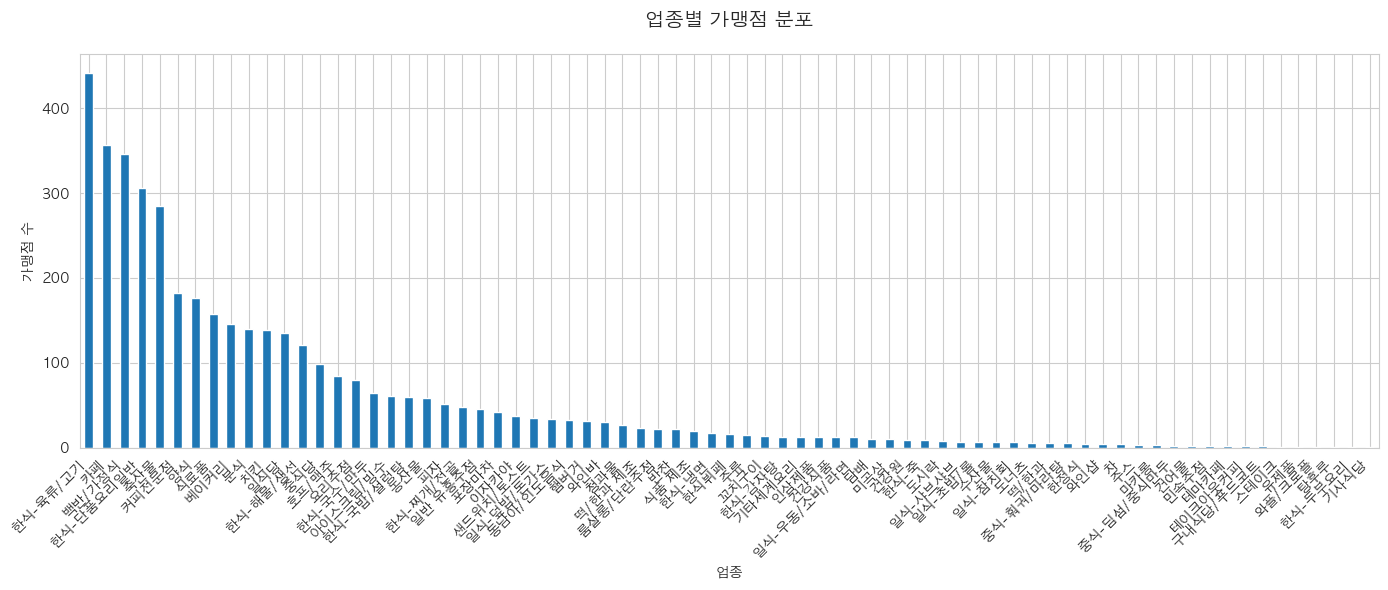

In [54]:
# 업종 분포
print("\n업종별 가맹점 수:")
industry_dist = df1['HPSN_MCT_ZCD_NM'].value_counts()
print(industry_dist)

plt.rc('font', family='AppleGothic')
plt.figure(figsize=(14, 6))
industry_dist.plot(kind='bar')
plt.title('업종별 가맹점 분포', fontsize=14, pad=20)
plt.xlabel('업종')
plt.ylabel('가맹점 수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


상권별 가맹점 수:
HPSN_MCT_BZN_CD_NM
성수            762
왕십리           538
뚝섬            468
한양대           328
마장동           257
금남시장          249
답십리           179
옥수            121
신금호           100
행당             85
장한평자동차         41
서면역             1
건대입구            1
동대문역사문화공원역      1
압구정로데오          1
오남              1
화양시장            1
방배역             1
미아사거리           1
풍산지구            1
자양              1
Name: count, dtype: int64


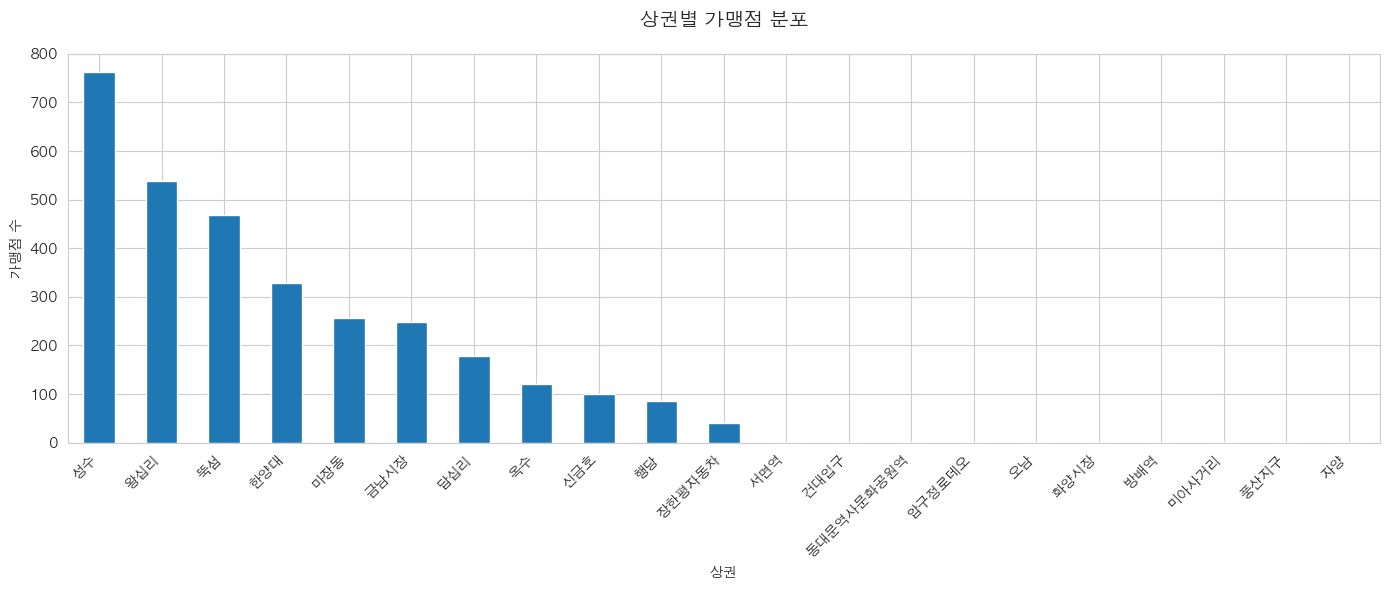

In [55]:
# 상권 분포
print("\n상권별 가맹점 수:")
district_dist = df1['HPSN_MCT_BZN_CD_NM'].value_counts()
print(district_dist)

plt.figure(figsize=(14, 6))
district_dist.plot(kind='bar')
plt.title('상권별 가맹점 분포', fontsize=14, pad=20)
plt.xlabel('상권')
plt.ylabel('가맹점 수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [56]:
# 개설일/폐업일 분석
df1['ARE_D'] = pd.to_datetime(df1['ARE_D'], format='%Y%m%d', errors='coerce')
df1['MCT_ME_D'] = pd.to_datetime(df1['MCT_ME_D'], format='%Y%m%d', errors='coerce')

print("\n개설일 범위:")
print(f"최소: {df1['ARE_D'].min()}")
print(f"최대: {df1['ARE_D'].max()}")

print("\n폐업 가맹점 수:")
closed_count = df1['MCT_ME_D'].notna().sum()
print(f"폐업: {closed_count:,}개 ({closed_count/len(df1)*100:.2f}%)")
print(f"운영중: {df1['MCT_ME_D'].isna().sum():,}개 ({df1['MCT_ME_D'].isna().sum()/len(df1)*100:.2f}%)")


개설일 범위:
최소: 1990-02-28 00:00:00
최대: 2024-12-23 00:00:00

폐업 가맹점 수:
폐업: 127개 (3.03%)
운영중: 4,058개 (96.97%)


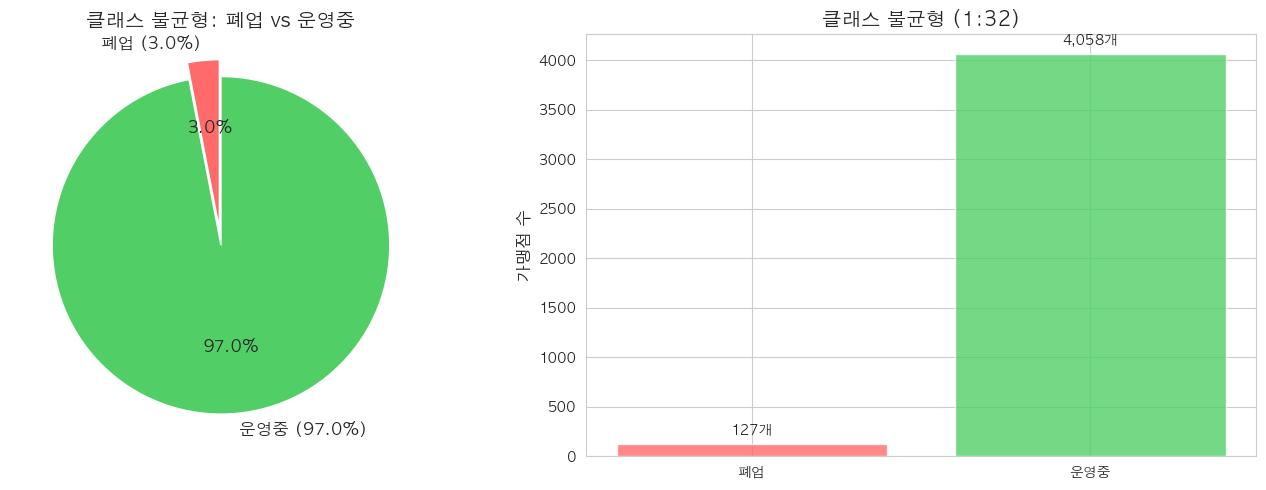

In [57]:
import matplotlib.pyplot as plt

# 클래스 분포
closed = 127
operating = 4058
labels = ['폐업 (3.0%)', '운영중 (97.0%)']
sizes = [closed, operating]
colors = ['#ff6b6b', '#51cf66']
explode = (0.1, 0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
ax1.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
ax1.set_title('클래스 불균형: 폐업 vs 운영중', fontsize=14, fontweight='bold')

# Bar chart with imbalance ratio
ax2.bar(['폐업', '운영중'], sizes, color=colors, alpha=0.8)
ax2.set_ylabel('가맹점 수', fontsize=12)
ax2.set_title('클래스 불균형 (1:32)', fontsize=14, fontweight='bold')
ax2.text(0, closed+100, f'{closed:,}개', ha='center')
ax2.text(1, operating+100, f'{operating:,}개', ha='center')
plt.tight_layout()

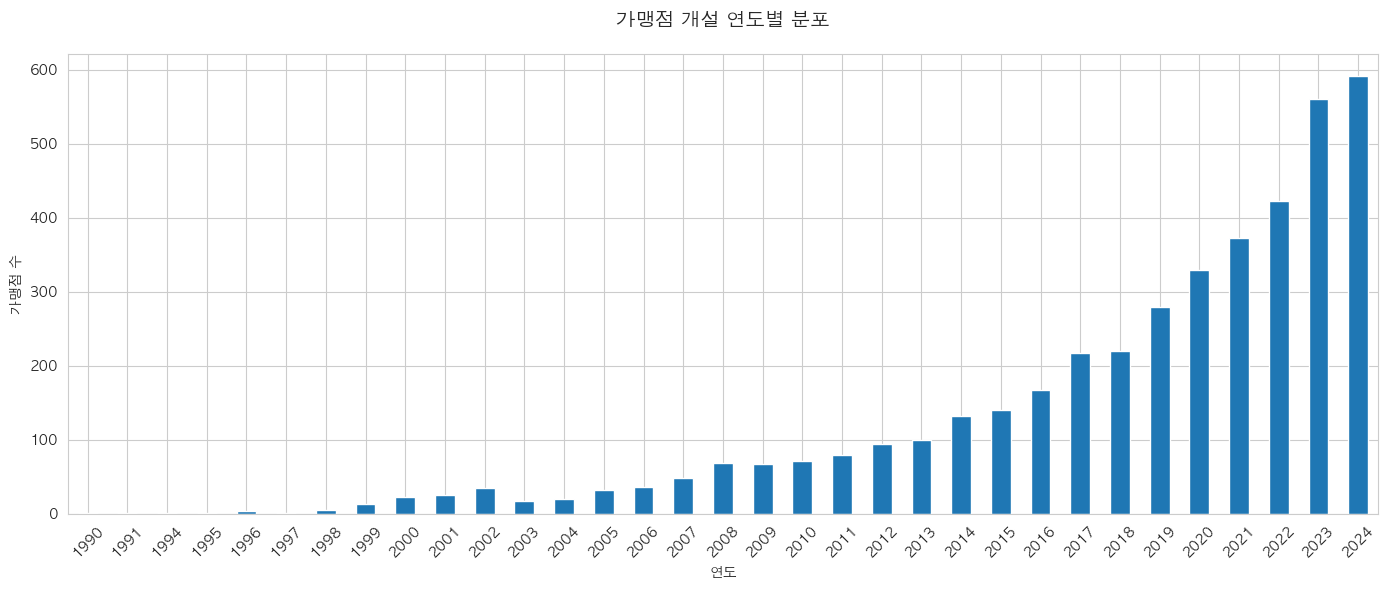

In [58]:
# 개설일 연도별 분포
df1['ARE_YEAR'] = df1['ARE_D'].dt.year

plt.figure(figsize=(14, 6))
df1['ARE_YEAR'].value_counts().sort_index().plot(kind='bar')
plt.title('가맹점 개설 연도별 분포', fontsize=14, pad=20)
plt.xlabel('연도')
plt.ylabel('가맹점 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
# 브랜드 분석
print("\n브랜드 정보:")
brand_counts = df1['MCT_BRD_NUM'].value_counts()
print(f"총 브랜드 수: {df1['MCT_BRD_NUM'].nunique():,}개")
print(f"브랜드가 있는 가맹점: {df1['MCT_BRD_NUM'].notna().sum():,}개")
print(f"브랜드가 없는 가맹점: {df1['MCT_BRD_NUM'].isna().sum():,}개")

# 복수 매장을 가진 브랜드
multi_store_brands = brand_counts[brand_counts > 1]
print(f"\n복수 매장 브랜드 수: {len(multi_store_brands):,}개")
print(f"\n매장 수 상위 10개 브랜드:")
print(brand_counts.head(10))


브랜드 정보:
총 브랜드 수: 287개
브랜드가 있는 가맹점: 542개
브랜드가 없는 가맹점: 3,643개

복수 매장 브랜드 수: 87개

매장 수 상위 10개 브랜드:
MCT_BRD_NUM
커피전문점2       20
베이커리10       18
커피전문점6       14
커피전문점11      13
커피전문점4       10
커피전문점13       9
피자8           9
아이스크림/빙수1     8
치킨6           7
한식-해물/생선2     7
Name: count, dtype: int64


## 3. 데이터셋 2: 가맹점 월별 이용 정보 분석

In [60]:
# 기본 정보
print("=" * 80)
print("Dataset 2: 가맹점 월별 이용 정보")
print("=" * 80)
print(f"\n데이터 shape: {df2.shape}")
print(f"\n컬럼 목록:")
df2.info()

Dataset 2: 가맹점 월별 이용 정보

데이터 shape: (86590, 15)

컬럼 목록:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86590 entries, 0 to 86589
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ENCODED_MCT             86590 non-null  object 
 1   TA_YM                   86590 non-null  int64  
 2   MCT_OPE_MS_CN           86590 non-null  object 
 3   RC_M1_SAA               86590 non-null  object 
 4   RC_M1_TO_UE_CT          86590 non-null  object 
 5   RC_M1_UE_CUS_CN         86590 non-null  object 
 6   RC_M1_AV_NP_AT          86590 non-null  object 
 7   APV_CE_RAT              79958 non-null  object 
 8   DLV_SAA_RAT             86590 non-null  float64
 9   M1_SME_RY_SAA_RAT       86590 non-null  float64
 10  M1_SME_RY_CNT_RAT       86590 non-null  float64
 11  M12_SME_RY_SAA_PCE_RT   86590 non-null  float64
 12  M12_SME_BZN_SAA_PCE_RT  86590 non-null  float64
 13  M12_SME_RY_ME_MCT_RAT   86590 non-n

In [61]:
# 처음 몇 행 확인
display(df2.head(10))

,ENCODED_MCT,TA_YM,MCT_OPE_MS_CN,RC_M1_SAA,RC_M1_TO_UE_CT,RC_M1_UE_CUS_CN,RC_M1_AV_NP_AT,APV_CE_RAT,DLV_SAA_RAT,M1_SME_RY_SAA_RAT,M1_SME_RY_CNT_RAT,M12_SME_RY_SAA_PCE_RT,M12_SME_BZN_SAA_PCE_RT,M12_SME_RY_ME_MCT_RAT,M12_SME_BZN_ME_MCT_RAT
0,000F03E44A,202404,4_50-75%,5_75-90%,5_75-90%,5_75-90%,5_75-90%,1_상위1구간,-999999.9,2.6,10.6,93.8,71.5,16.7,7.8
1,000F03E44A,202312,4_50-75%,6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),NaN,-999999.9,0.0,0.0,94.8,73.4,16.6,7.2
2,002816BA73,202404,2_10-25%,3_25-50%,4_50-75%,4_50-75%,2_10-25%,6_상위6구간(하위1구간),-999999.9,96.6,40.8,15.6,20.0,17.5,5.2
3,002816BA73,202411,2_10-25%,3_25-50%,4_50-75%,4_50-75%,2_10-25%,6_상위6구간(하위1구간),-999999.9,108.0,46.4,16.8,19.8,16.9,6.9
4,002816BA73,202406,2_10-25%,4_50-75%,4_50-75%,4_50-75%,2_10-25%,1_상위1구간,-999999.9,74.2,38.1,16.0,19.9,17.3,5.6
5,002816BA73,202305,2_10-25%,3_25-50%,4_50-75%,4_50-75%,2_10-25%,1_상위1구간,-999999.9,84.1,42.3,18.3,22.6,17.1,6.4
6,003473B465,202401,3_25-50%,6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),NaN,-999999.9,0.0,0.0,86.6,70.9,17.5,7.1
7,003AC99735,202311,4_50-75%,2_10-25%,1_10%이하,1_10%이하,6_90%초과(하위 10% 이하),3_상위3구간,1.7,274.0,501.2,4.2,10.0,14.1,8.3
8,003AC99735,202304,4_50-75%,2_10-25%,1_10%이하,1_10%이하,5_75-90%,3_상위3구간,1.0,281.3,478.1,4.3,10.0,11.4,9.5
9,003AC99735,202411,3_25-50%,2_10-25%,1_10%이하,1_10%이하,6_90%초과(하위 10% 이하),3_상위3구간,1.2,250.9,472.4,3.7,9.6,14.0,7.9


In [62]:
# 결측치 및 Special Value (-999999.9) 확인
print("\n결측치 현황:")
missing_df2 = pd.DataFrame({
    'Column': df2.columns,
    'Missing_Count': df2.isnull().sum(),
    'Missing_Percent': (df2.isnull().sum() / len(df2) * 100).round(2)
})
display(missing_df2[missing_df2['Missing_Count'] > 0])

print("\nSpecial Value (-999999.9) 현황:")
sv_cols = ['DLV_SAA_RAT', 'M1_SME_RY_SAA_RAT', 'M1_SME_RY_CNT_RAT', 
           'M12_SME_RY_SAA_PCE_RT', 'M12_SME_BZN_SAA_PCE_RT', 
           'M12_SME_RY_ME_MCT_RAT', 'M12_SME_BZN_ME_MCT_RAT']
for col in sv_cols:
    if col in df2.columns:
        sv_count = (df2[col] == -999999.9).sum()
        print(f"{col_names_kr[col]} ({col}): {sv_count:,}개 ({sv_count/len(df2)*100:.2f}%)")


결측치 현황:


,Column,Missing_Count,Missing_Percent
APV_CE_RAT,APV_CE_RAT,6632,7.66



Special Value (-999999.9) 현황:
배달매출 비율 (DLV_SAA_RAT): 57,345개 (66.23%)
동일 업종 매출액 비교 (M1_SME_RY_SAA_RAT): 0개 (0.00%)
동일 업종 이용 건수 비교 (M1_SME_RY_CNT_RAT): 0개 (0.00%)
동일 업종 매출액 순위 비율 (M12_SME_RY_SAA_PCE_RT): 0개 (0.00%)
동일 상권 매출액 순위 비율 (M12_SME_BZN_SAA_PCE_RT): 0개 (0.00%)
동일 업종 해지 가맹점 비중 (M12_SME_RY_ME_MCT_RAT): 0개 (0.00%)
동일 상권 해지 가맹점 비중 (M12_SME_BZN_ME_MCT_RAT): 21,419개 (24.74%)



기준년월 분포:
기간: 202301 ~ 202412
총 월 수: 24개월


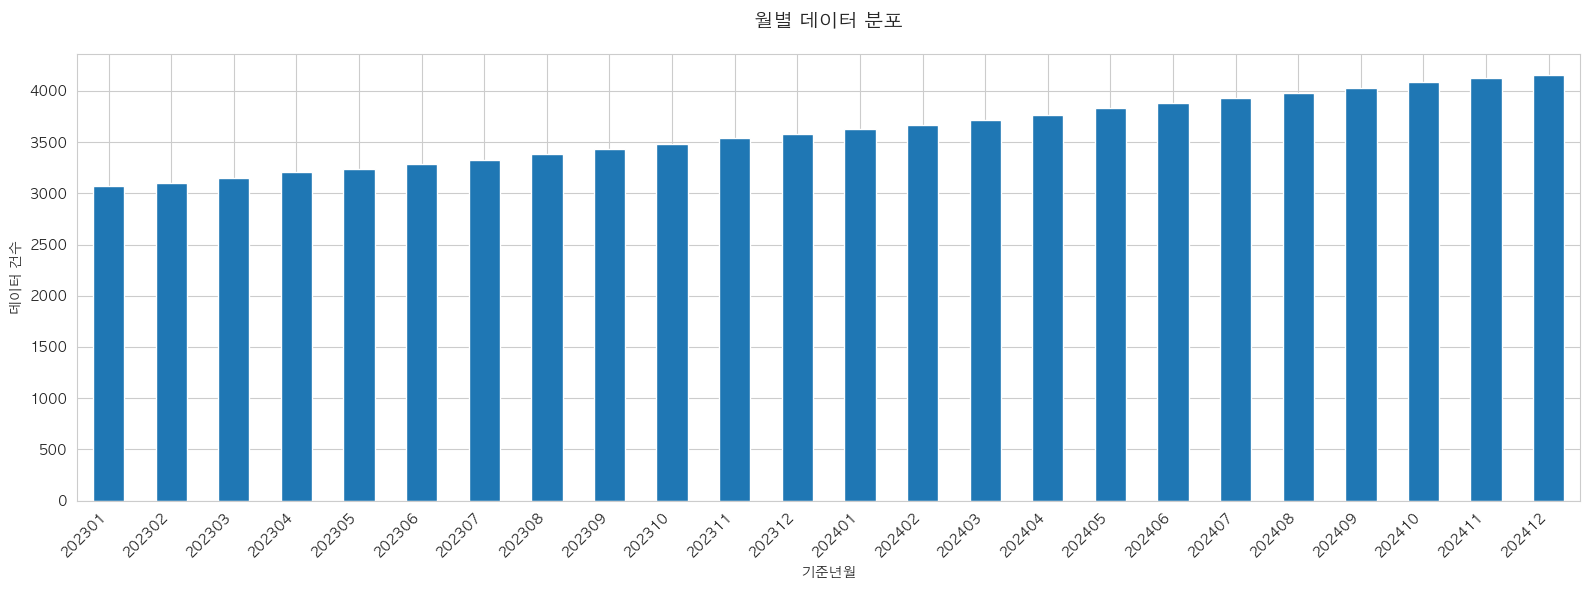

In [63]:
# 기준년월 분포
print("\n기준년월 분포:")
ym_dist = df2['TA_YM'].value_counts().sort_index()
print(f"기간: {ym_dist.index.min()} ~ {ym_dist.index.max()}")
print(f"총 월 수: {len(ym_dist)}개월")

plt.figure(figsize=(16, 6))
ym_dist.plot(kind='bar')
plt.title('월별 데이터 분포', fontsize=14, pad=20)
plt.xlabel('기준년월')
plt.ylabel('데이터 건수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


가맹점당 월별 데이터 건수:
count    4185.000000
mean       20.690562
std         6.349717
min         1.000000
25%        21.000000
50%        24.000000
75%        24.000000
max        24.000000
Name: count, dtype: float64


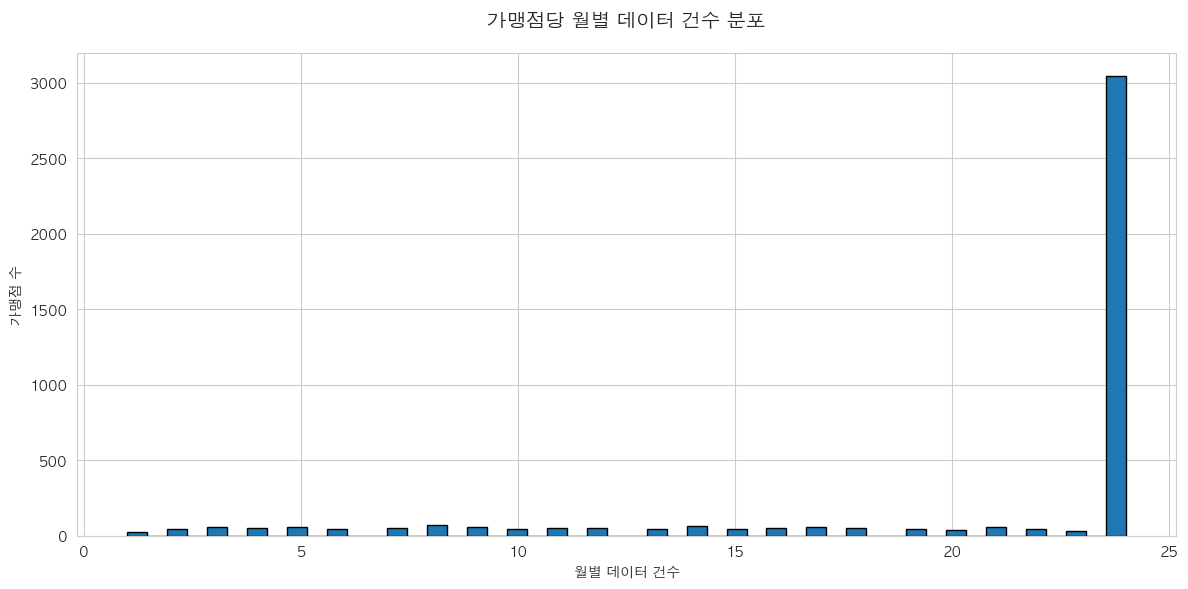

In [64]:
# 가맹점당 데이터 수 확인
mct_counts = df2['ENCODED_MCT'].value_counts()
print("\n가맹점당 월별 데이터 건수:")
print(mct_counts.describe())

plt.figure(figsize=(12, 6))
plt.hist(mct_counts, bins=50, edgecolor='black')
plt.title('가맹점당 월별 데이터 건수 분포', fontsize=14, pad=20)
plt.xlabel('월별 데이터 건수')
plt.ylabel('가맹점 수')
plt.tight_layout()
plt.show()

In [65]:
# 구간 데이터 분포 (6개 구간)
interval_cols = ['MCT_OPE_MS_CN', 'RC_M1_SAA', 'RC_M1_TO_UE_CT', 
                 'RC_M1_UE_CUS_CN', 'RC_M1_AV_NP_AT', 'APV_CE_RAT']

print("\n구간 데이터 분포:")
for col in interval_cols:
    if col in df2.columns:
        print(f"\n{col_names_kr[col]} ({col}):")
        print(df2[col].value_counts().sort_index())


구간 데이터 분포:

가맹점 운영 개월 수 (MCT_OPE_MS_CN):
MCT_OPE_MS_CN
1_10%이하                8691
2_10-25%              13119
3_25-50%              21812
4_50-75%              21567
5_75-90%              13454
6_90%초과(하위 10% 이하)     7947
Name: count, dtype: int64

최근 1개월 매출액 (RC_M1_SAA):
RC_M1_SAA
1_10%이하                8799
2_10-25%              13167
3_25-50%              21800
4_50-75%              21692
5_75-90%              12912
6_90%초과(하위 10% 이하)     8220
Name: count, dtype: int64

최근 1개월 총 이용 건수 (RC_M1_TO_UE_CT):
RC_M1_TO_UE_CT
1_10%이하                8719
2_10-25%              13023
3_25-50%              21981
4_50-75%              21945
5_75-90%              14211
6_90%초과(하위 10% 이하)     6711
Name: count, dtype: int64

최근 1개월 이용 고객 수 (RC_M1_UE_CUS_CN):
RC_M1_UE_CUS_CN
1_10%이하                8771
2_10-25%              13147
3_25-50%              21934
4_50-75%              22026
5_75-90%              14001
6_90%초과(하위 10% 이하)     6711
Name: count, dtype: int64

최근 1개월 평균 순이익액 (RC_M1_AV_NP_AT):

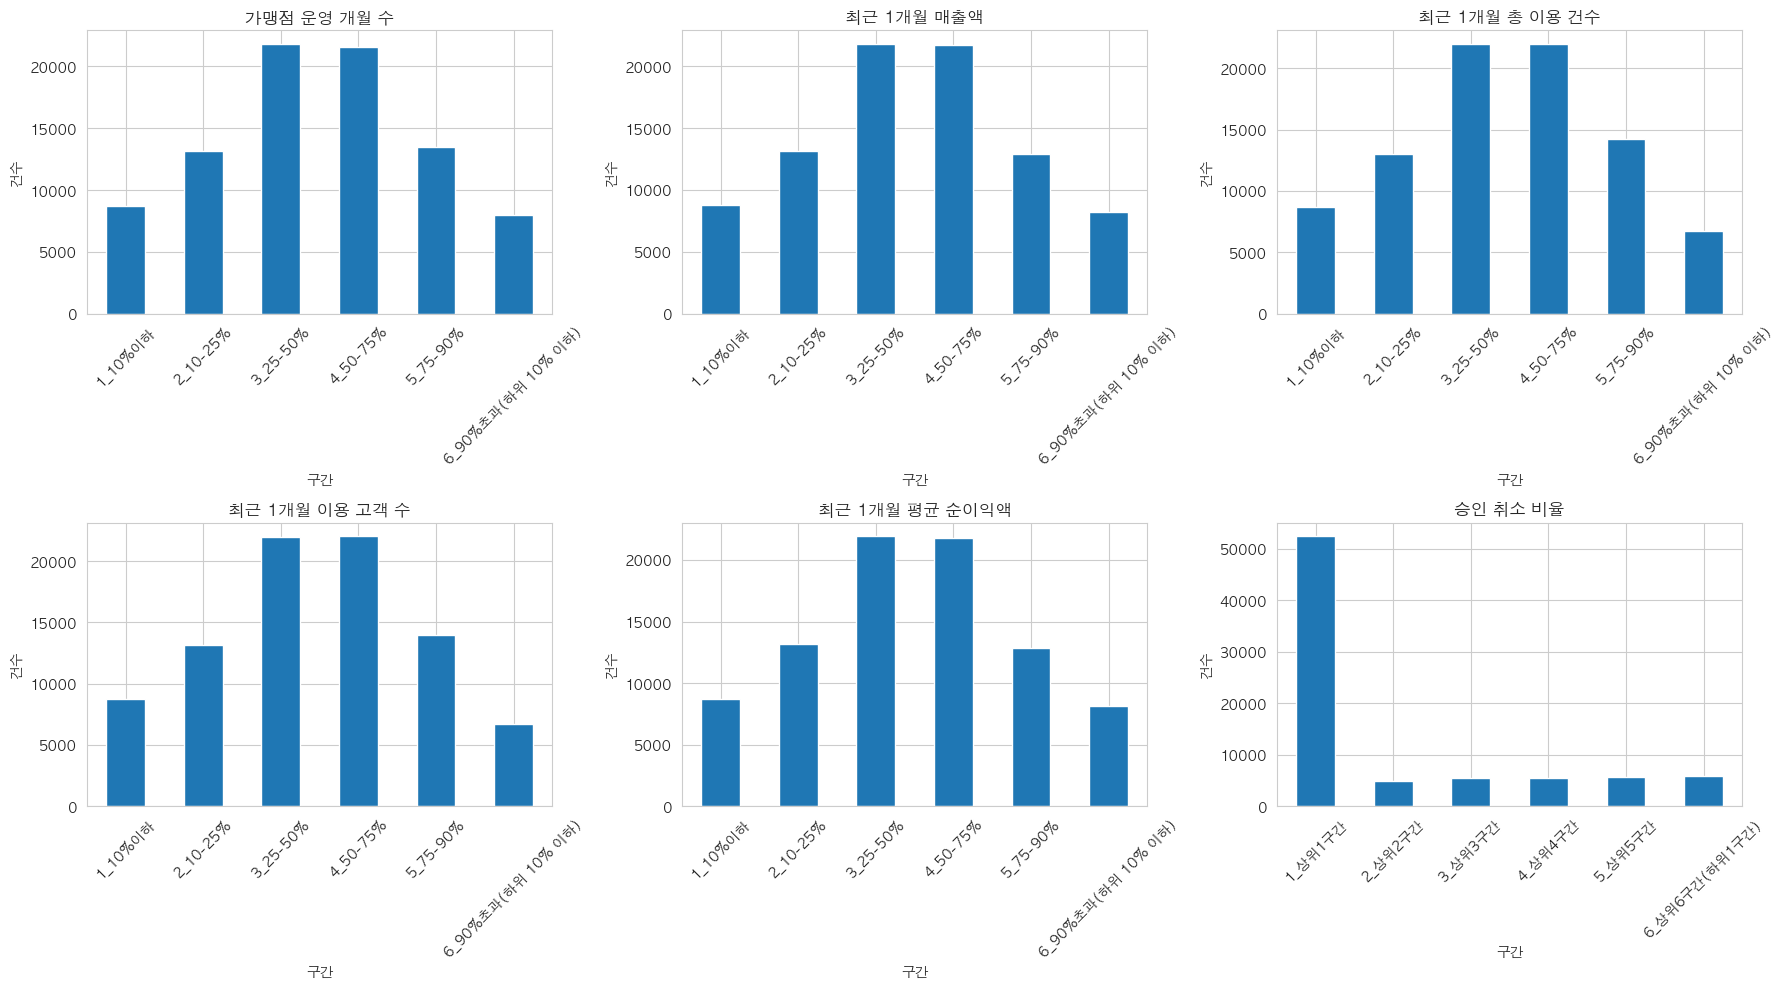

In [66]:
# 구간 데이터 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(interval_cols):
    if col in df2.columns:
        df2[col].value_counts().sort_index().plot(kind='bar', ax=axes[idx])
        axes[idx].set_title(col_names_kr[col], fontsize=12)
        axes[idx].set_xlabel('구간')
        axes[idx].set_ylabel('건수')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


배달매출 비율 통계 (SV 제외):
count    29245.000000
mean        27.786917
std         30.455040
min          0.000000
25%          3.200000
50%         14.800000
75%         45.300000
max        111.200000
Name: DLV_SAA_RAT, dtype: float64


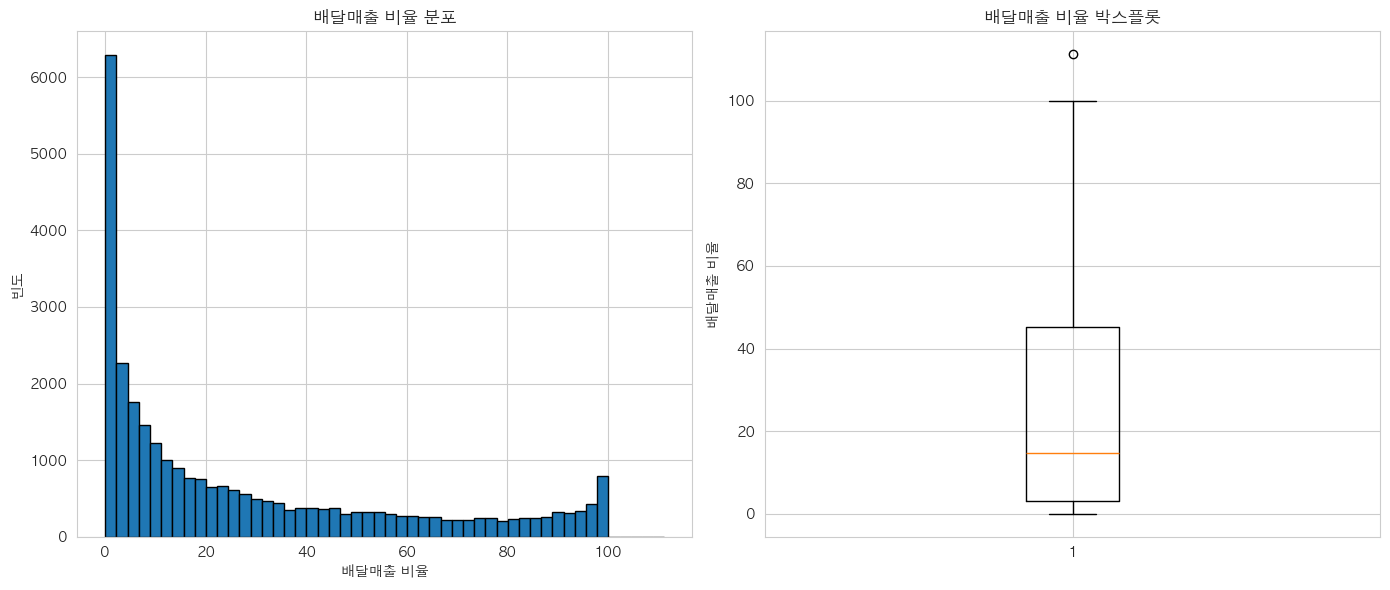

In [67]:
# 배달매출 비율 분석 (SV 제외)
df2_with_delivery = df2[df2['DLV_SAA_RAT'] != -999999.9].copy()

print("\n배달매출 비율 통계 (SV 제외):")
print(df2_with_delivery['DLV_SAA_RAT'].describe())

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(df2_with_delivery['DLV_SAA_RAT'], bins=50, edgecolor='black')
plt.title('배달매출 비율 분포', fontsize=12)
plt.xlabel('배달매출 비율')
plt.ylabel('빈도')

plt.subplot(1, 2, 2)
plt.boxplot(df2_with_delivery['DLV_SAA_RAT'])
plt.title('배달매출 비율 박스플롯', fontsize=12)
plt.ylabel('배달매출 비율')

plt.tight_layout()
plt.show()


동일 업종 매출액 비교 통계 (SV 제외):
count    86590.000000
mean       134.503306
std        167.981671
min        -70.000000
25%         25.200000
50%         82.500000
75%        181.700000
max       4300.900000
Name: M1_SME_RY_SAA_RAT, dtype: float64

동일 업종 이용 건수 비교 통계 (SV 제외):
count    86590.000000
mean       152.312380
std        227.070665
min          0.000000
25%         22.100000
50%         81.700000
75%        199.600000
max       7059.800000
Name: M1_SME_RY_CNT_RAT, dtype: float64


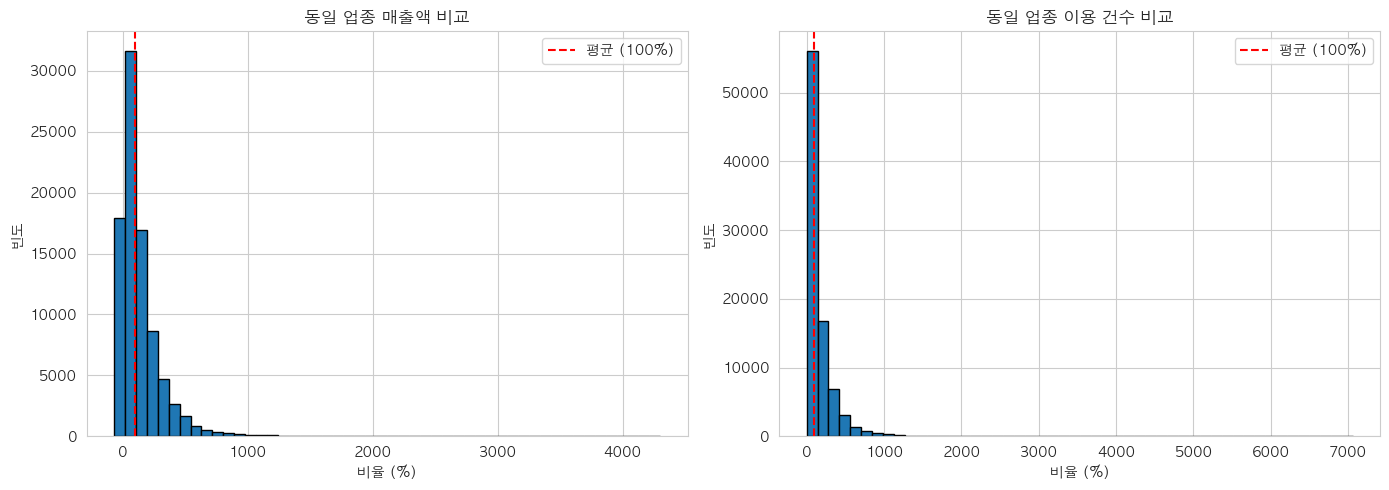

In [68]:
# 동일 업종/상권 비교 지표 분석 (SV 제외)
ratio_cols = ['M1_SME_RY_SAA_RAT', 'M1_SME_RY_CNT_RAT']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, col in enumerate(ratio_cols):
    if col in df2.columns:
        data = df2[df2[col] != -999999.9][col]
        axes[idx].hist(data, bins=50, edgecolor='black')
        axes[idx].axvline(100, color='red', linestyle='--', label='평균 (100%)')
        axes[idx].set_title(col_names_kr[col], fontsize=12)
        axes[idx].set_xlabel('비율 (%)')
        axes[idx].set_ylabel('빈도')
        axes[idx].legend()
        
        print(f"\n{col_names_kr[col]} 통계 (SV 제외):")
        print(data.describe())

plt.tight_layout()
plt.show()


동일 업종 매출액 순위 비율 통계 (SV 제외):
count    86590.000000
mean        31.184643
std         25.253279
min          0.100000
25%          9.900000
50%         23.900000
75%         48.200000
max        100.000000
Name: M12_SME_RY_SAA_PCE_RT, dtype: float64

동일 상권 매출액 순위 비율 통계 (SV 제외):
count    86590.000000
mean        24.070313
std         22.843491
min          0.000000
25%          1.300000
50%         18.900000
75%         39.200000
max         99.600000
Name: M12_SME_BZN_SAA_PCE_RT, dtype: float64


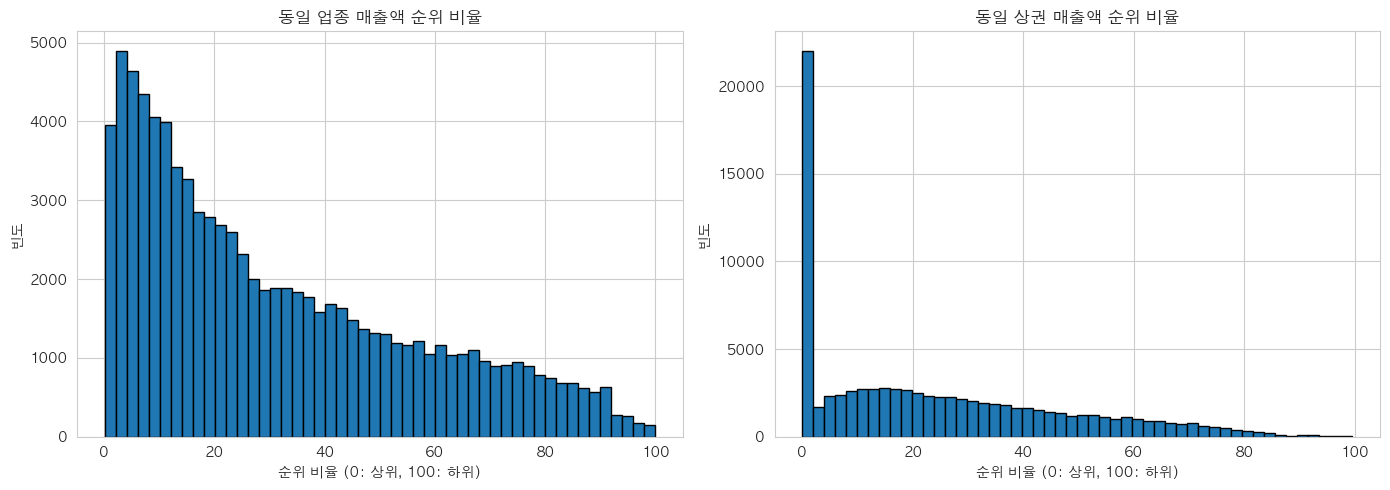

In [69]:
# 순위 비율 분석 (SV 제외)
rank_cols = ['M12_SME_RY_SAA_PCE_RT', 'M12_SME_BZN_SAA_PCE_RT']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, col in enumerate(rank_cols):
    if col in df2.columns:
        data = df2[df2[col] != -999999.9][col]
        axes[idx].hist(data, bins=50, edgecolor='black')
        axes[idx].set_title(col_names_kr[col], fontsize=12)
        axes[idx].set_xlabel('순위 비율 (0: 상위, 100: 하위)')
        axes[idx].set_ylabel('빈도')
        
        print(f"\n{col_names_kr[col]} 통계 (SV 제외):")
        print(data.describe())

plt.tight_layout()
plt.show()


동일 업종 해지 가맹점 비중 통계 (SV 제외):
count    86590.000000
mean        16.187137
std          3.876532
min          0.000000
25%         14.100000
50%         17.000000
75%         18.700000
max         59.100000
Name: M12_SME_RY_ME_MCT_RAT, dtype: float64

동일 상권 해지 가맹점 비중 통계 (SV 제외):
count    65171.000000
mean         8.526055
std          1.350034
min          4.200000
25%          7.900000
50%          8.600000
75%          9.300000
max         13.900000
Name: M12_SME_BZN_ME_MCT_RAT, dtype: float64


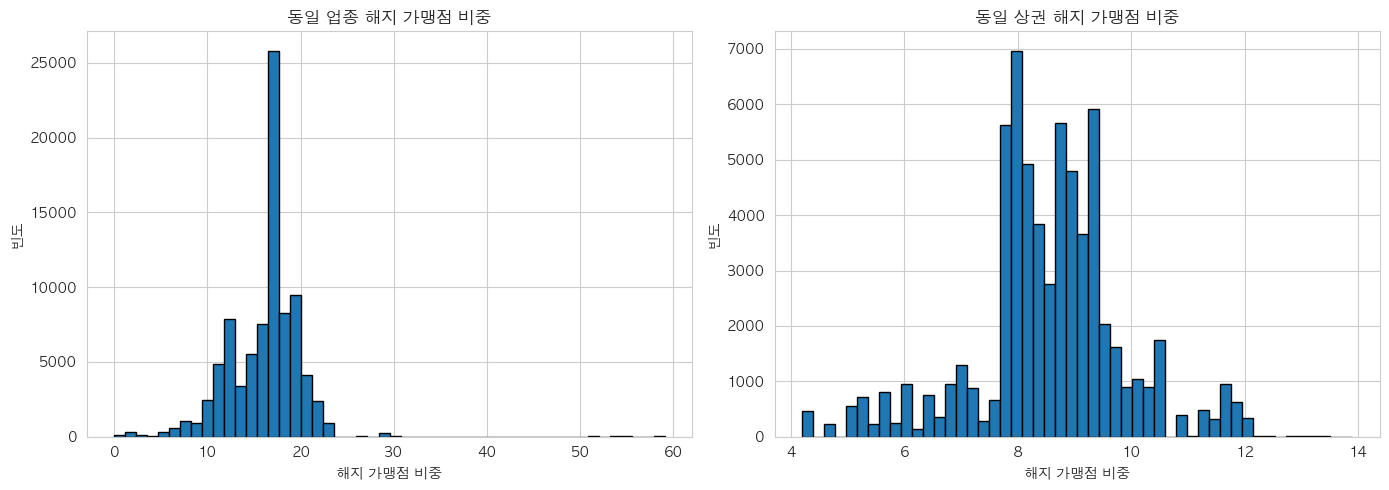

In [70]:
# 해지 가맹점 비중 분석 (SV 제외)
closure_cols = ['M12_SME_RY_ME_MCT_RAT', 'M12_SME_BZN_ME_MCT_RAT']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, col in enumerate(closure_cols):
    if col in df2.columns:
        data = df2[df2[col] != -999999.9][col]
        axes[idx].hist(data, bins=50, edgecolor='black')
        axes[idx].set_title(col_names_kr[col], fontsize=12)
        axes[idx].set_xlabel('해지 가맹점 비중')
        axes[idx].set_ylabel('빈도')
        
        print(f"\n{col_names_kr[col]} 통계 (SV 제외):")
        print(data.describe())

plt.tight_layout()
plt.show()

## 4. 데이터셋 3: 가맹점 월별 이용 고객정보 분석

In [71]:
# 기본 정보
print("=" * 80)
print("Dataset 3: 가맹점 월별 이용 고객정보")
print("=" * 80)
print(f"\n데이터 shape: {df3.shape}")
print(f"\n컬럼 목록:")
df3.info()

Dataset 3: 가맹점 월별 이용 고객정보

데이터 shape: (86590, 17)

컬럼 목록:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86590 entries, 0 to 86589
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ENCODED_MCT               86590 non-null  object 
 1   TA_YM                     86590 non-null  int64  
 2   M12_MAL_1020_RAT          86590 non-null  float64
 3   M12_MAL_30_RAT            86590 non-null  float64
 4   M12_MAL_40_RAT            86590 non-null  float64
 5   M12_MAL_50_RAT            86590 non-null  float64
 6   M12_MAL_60_RAT            86590 non-null  float64
 7   M12_FME_1020_RAT          86590 non-null  float64
 8   M12_FME_30_RAT            86590 non-null  float64
 9   M12_FME_40_RAT            86590 non-null  float64
 10  M12_FME_50_RAT            86590 non-null  float64
 11  M12_FME_60_RAT            86590 non-null  float64
 12  MCT_UE_CLN_REU_RAT        86590 non-null  float64
 13  MCT

In [72]:
# 처음 몇 행 확인
display(df3.head(10))

,ENCODED_MCT,TA_YM,M12_MAL_1020_RAT,M12_MAL_30_RAT,M12_MAL_40_RAT,M12_MAL_50_RAT,M12_MAL_60_RAT,M12_FME_1020_RAT,M12_FME_30_RAT,M12_FME_40_RAT,M12_FME_50_RAT,M12_FME_60_RAT,MCT_UE_CLN_REU_RAT,MCT_UE_CLN_NEW_RAT,RC_M1_SHC_RSD_UE_CLN_RAT,RC_M1_SHC_WP_UE_CLN_RAT,RC_M1_SHC_FLP_UE_CLN_RAT
0,0305234DDB,202311,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,0.0,-999999.9,-999999.9,-999999.9
1,0495B069FF,202403,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.00,25.0,0.0,0.0,100.0
2,0495B069FF,202405,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.33,0.0,-999999.9,-999999.9,-999999.9
3,0495B069FF,202406,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.33,0.0,-999999.9,-999999.9,-999999.9
4,055EDDDD01,202410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,33.33,0.0,-999999.9,-999999.9,-999999.9
5,055EDDDD01,202311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,33.33,0.0,-999999.9,-999999.9,-999999.9
6,06A87DAA45,202411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.00,0.0,0.0,100.0,0.0
7,06A87DAA45,202310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.00,0.0,-999999.9,-999999.9,-999999.9
8,06A87DAA45,202312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.00,0.0,-999999.9,-999999.9,-999999.9
9,09D2771DD5,202406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.00,0.0,-999999.9,-999999.9,-999999.9


In [73]:
# Special Value (-999999.9) 확인
print("\nSpecial Value (-999999.9) 현황:")
sv_count_summary = {}
for col in df3.columns:
    if col not in ['ENCODED_MCT', 'TA_YM']:
        sv_count = (df3[col] == -999999.9).sum()
        sv_count_summary[col] = sv_count
        col_kr = col_names_kr.get(col, col)
        print(f"{col_kr} ({col}): {sv_count:,}개 ({sv_count/len(df3)*100:.2f}%)")


Special Value (-999999.9) 현황:
남성 10-20대 비율 (M12_MAL_1020_RAT): 2,004개 (2.31%)
남성 30대 비율 (M12_MAL_30_RAT): 2,004개 (2.31%)
남성 40대 비율 (M12_MAL_40_RAT): 2,004개 (2.31%)
남성 50대 비율 (M12_MAL_50_RAT): 2,004개 (2.31%)
남성 60대 이상 비율 (M12_MAL_60_RAT): 2,004개 (2.31%)
여성 10-20대 비율 (M12_FME_1020_RAT): 2,004개 (2.31%)
여성 30대 비율 (M12_FME_30_RAT): 2,004개 (2.31%)
여성 40대 비율 (M12_FME_40_RAT): 2,004개 (2.31%)
여성 50대 비율 (M12_FME_50_RAT): 2,004개 (2.31%)
여성 60대 이상 비율 (M12_FME_60_RAT): 2,004개 (2.31%)
재방문 고객 비율 (MCT_UE_CLN_REU_RAT): 1,643개 (1.90%)
신규 고객 비율 (MCT_UE_CLN_NEW_RAT): 1,643개 (1.90%)
거주지 고객 비율 (RC_M1_SHC_RSD_UE_CLN_RAT): 7,327개 (8.46%)
직장 고객 비율 (RC_M1_SHC_WP_UE_CLN_RAT): 7,327개 (8.46%)
유동인구 고객 비율 (RC_M1_SHC_FLP_UE_CLN_RAT): 7,327개 (8.46%)


In [74]:
# 연령대별 성별 고객 비중 분석 (SV 제외)
gender_age_cols = [
    'M12_MAL_1020_RAT', 'M12_MAL_30_RAT', 'M12_MAL_40_RAT', 'M12_MAL_50_RAT', 'M12_MAL_60_RAT',
    'M12_FME_1020_RAT', 'M12_FME_30_RAT', 'M12_FME_40_RAT', 'M12_FME_50_RAT', 'M12_FME_60_RAT'
]

# 유효한 데이터만 필터링 (모든 고객 정보 컬럼이 SV가 아닌 경우)
df3_valid = df3.copy()
for col in gender_age_cols:
    df3_valid = df3_valid[df3_valid[col] != -999999.9]

print(f"\n유효한 고객정보 데이터: {len(df3_valid):,}건 ({len(df3_valid)/len(df3)*100:.2f}%)")

# 평균 비중 계산
avg_ratios = df3_valid[gender_age_cols].mean()
print("\n평균 고객 비중:")
print(avg_ratios)


유효한 고객정보 데이터: 84,586건 (97.69%)

평균 고객 비중:
M12_MAL_1020_RAT    11.525991
M12_MAL_30_RAT      13.374123
M12_MAL_40_RAT      10.081328
M12_MAL_50_RAT      11.076727
M12_MAL_60_RAT       8.998239
M12_FME_1020_RAT    10.868017
M12_FME_30_RAT      11.300895
M12_FME_40_RAT       7.854147
M12_FME_50_RAT       8.067192
M12_FME_60_RAT       6.854265
dtype: float64


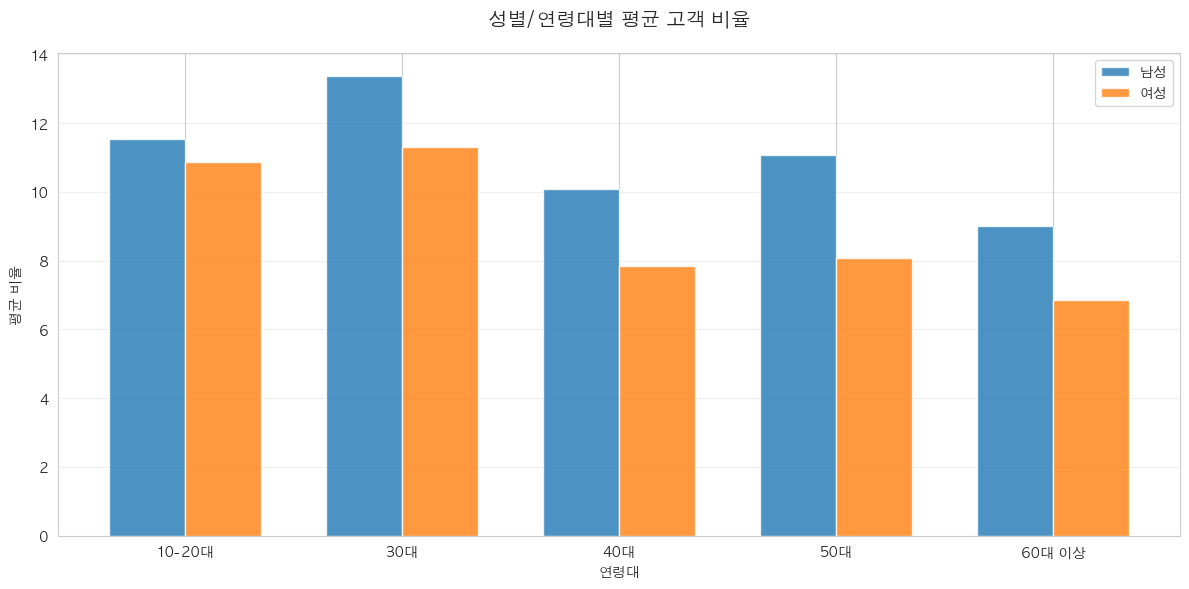

In [75]:
# 성별/연령대별 평균 비중 시각화
male_cols = [col for col in gender_age_cols if 'MAL' in col]
female_cols = [col for col in gender_age_cols if 'FME' in col]

male_avg = df3_valid[male_cols].mean().values
female_avg = df3_valid[female_cols].mean().values
age_labels = ['10-20대', '30대', '40대', '50대', '60대 이상']

x = np.arange(len(age_labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, male_avg, width, label='남성', alpha=0.8)
ax.bar(x + width/2, female_avg, width, label='여성', alpha=0.8)

ax.set_xlabel('연령대')
ax.set_ylabel('평균 비율')
ax.set_title('성별/연령대별 평균 고객 비율', fontsize=14, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(age_labels)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


재방문 고객 비중 통계:
count    84947.000000
mean        25.344110
std         15.120843
min          0.000000
25%         14.430000
50%         24.410000
75%         33.970000
max        100.000000
Name: MCT_UE_CLN_REU_RAT, dtype: float64

신규 고객 비중 통계:
count    84947.000000
mean         9.832667
std         14.384539
min          0.000000
25%          5.100000
50%          6.760000
75%          8.850000
max        100.000000
Name: MCT_UE_CLN_NEW_RAT, dtype: float64


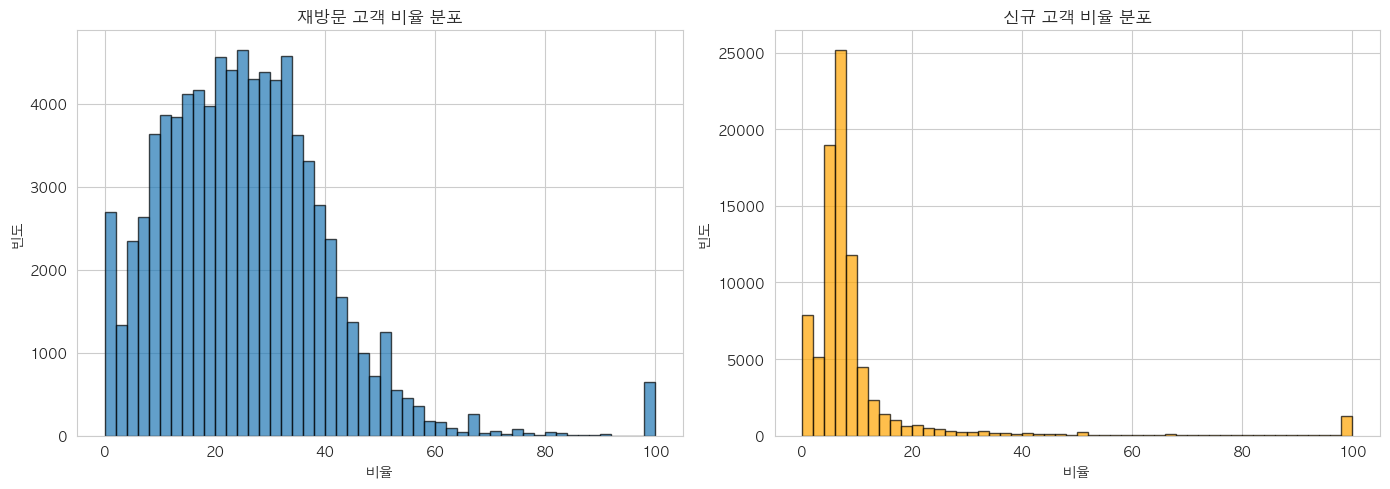

In [76]:
# 재방문/신규 고객 비중 분석 (SV 제외)
df3_customer_type = df3[
    (df3['MCT_UE_CLN_REU_RAT'] != -999999.9) & 
    (df3['MCT_UE_CLN_NEW_RAT'] != -999999.9)
].copy()

print("\n재방문 고객 비중 통계:")
print(df3_customer_type['MCT_UE_CLN_REU_RAT'].describe())

print("\n신규 고객 비중 통계:")
print(df3_customer_type['MCT_UE_CLN_NEW_RAT'].describe())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df3_customer_type['MCT_UE_CLN_REU_RAT'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('재방문 고객 비율 분포', fontsize=12)
axes[0].set_xlabel('비율')
axes[0].set_ylabel('빈도')

axes[1].hist(df3_customer_type['MCT_UE_CLN_NEW_RAT'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_title('신규 고객 비율 분포', fontsize=12)
axes[1].set_xlabel('비율')
axes[1].set_ylabel('빈도')

plt.tight_layout()
plt.show()


고객 유형별 평균 비중:
거주지 고객 비율: 34.88
직장 고객 비율: 13.18
유동인구 고객 비율: 51.94


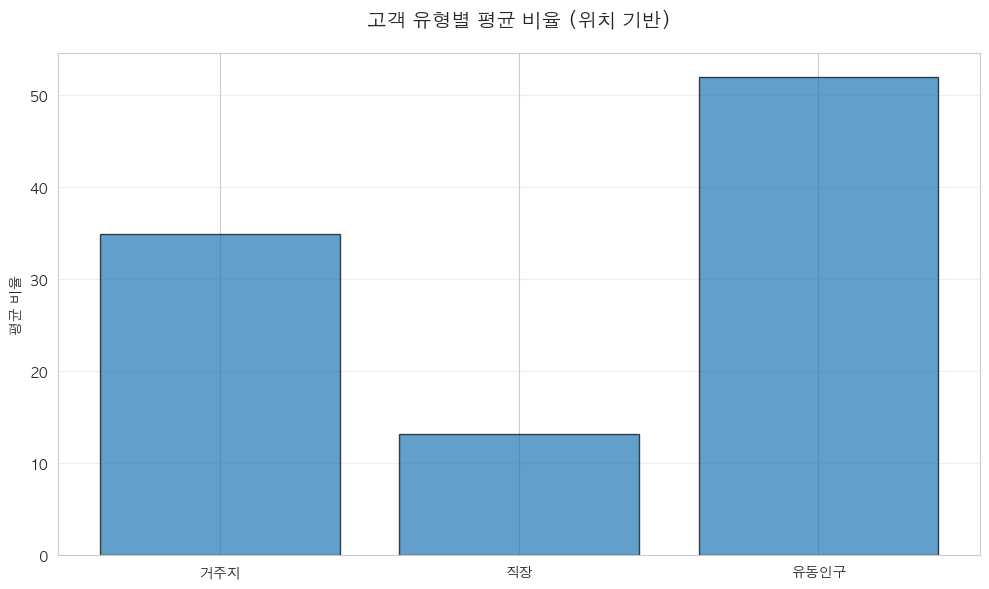

In [77]:
# 고객 유형별 비중 분석 (거주/직장/유동인구) (SV 제외)
location_cols = ['RC_M1_SHC_RSD_UE_CLN_RAT', 'RC_M1_SHC_WP_UE_CLN_RAT', 'RC_M1_SHC_FLP_UE_CLN_RAT']

df3_location = df3.copy()
for col in location_cols:
    df3_location = df3_location[df3_location[col] != -999999.9]

print("\n고객 유형별 평균 비중:")
for col in location_cols:
    print(f"{col_names_kr[col]}: {df3_location[col].mean():.2f}")

# 평균값 시각화
avg_values = [df3_location[col].mean() for col in location_cols]
labels = ['거주지', '직장', '유동인구']

plt.figure(figsize=(10, 6))
plt.bar(labels, avg_values, alpha=0.7, edgecolor='black')
plt.title('고객 유형별 평균 비율 (위치 기반)', fontsize=14, pad=20)
plt.ylabel('평균 비율')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


거주지 통계:
count    79263.000000
mean        34.882047
std         24.636196
min          0.000000
25%         14.300000
50%         31.500000
75%         51.700000
max        100.000000
Name: RC_M1_SHC_RSD_UE_CLN_RAT, dtype: float64

직장 통계:
count    79263.000000
mean        13.179571
std         14.128362
min          0.000000
25%          3.400000
50%          8.600000
75%         18.800000
max        100.000000
Name: RC_M1_SHC_WP_UE_CLN_RAT, dtype: float64

유동인구 통계:
count    79263.000000
mean        51.939785
std         23.885167
min          0.000000
25%         35.300000
50%         50.000000
75%         67.400000
max        100.000000
Name: RC_M1_SHC_FLP_UE_CLN_RAT, dtype: float64


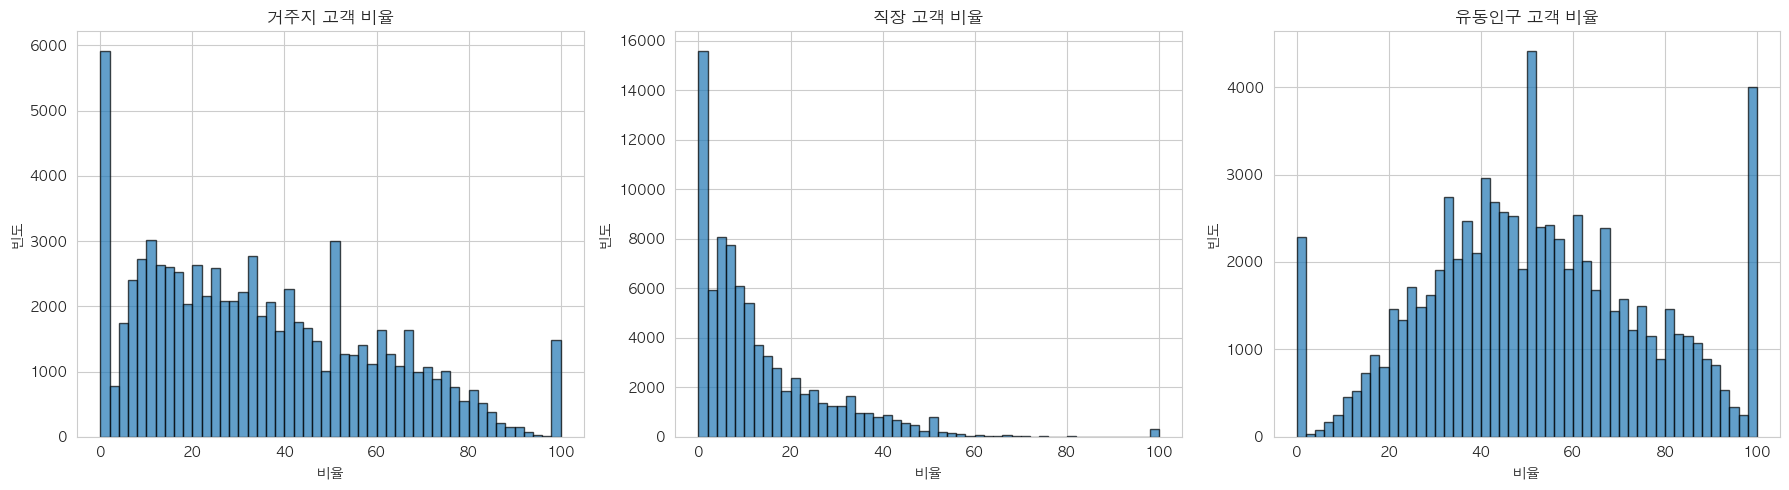

In [78]:
# 고객 유형별 분포 상세 분석
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (col, label) in enumerate(zip(location_cols, labels)):
    axes[idx].hist(df3_location[col], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{label} 고객 비율', fontsize=12)
    axes[idx].set_xlabel('비율')
    axes[idx].set_ylabel('빈도')
    
    print(f"\n{label} 통계:")
    print(df3_location[col].describe())

plt.tight_layout()
plt.show()

## 5. 데이터셋 간 관계 분석

In [79]:
# 데이터셋 간 가맹점 일치 확인
mct_df1 = set(df1['ENCODED_MCT'].unique())
mct_df2 = set(df2['ENCODED_MCT'].unique())
mct_df3 = set(df3['ENCODED_MCT'].unique())

print("데이터셋별 고유 가맹점 수:")
print(f"Dataset 1: {len(mct_df1):,}개")
print(f"Dataset 2: {len(mct_df2):,}개")
print(f"Dataset 3: {len(mct_df3):,}개")

print("\n데이터셋 간 공통 가맹점:")
common_all = mct_df1 & mct_df2 & mct_df3
print(f"3개 데이터셋 모두 존재: {len(common_all):,}개")

print("\n데이터셋 2와 3 일치 확인:")
print(f"Dataset 2 = Dataset 3: {mct_df2 == mct_df3}")
print(f"공통 가맹점: {len(mct_df2 & mct_df3):,}개")

데이터셋별 고유 가맹점 수:
Dataset 1: 4,185개
Dataset 2: 4,185개
Dataset 3: 4,185개

데이터셋 간 공통 가맹점:
3개 데이터셋 모두 존재: 4,185개

데이터셋 2와 3 일치 확인:
Dataset 2 = Dataset 3: True
공통 가맹점: 4,185개


In [80]:
# Dataset 2와 3 병합 (동일한 key로 병합 가능)
df_merged = df2.merge(df3, on=['ENCODED_MCT', 'TA_YM'], how='inner')
print(f"\n병합된 데이터셋 shape: {df_merged.shape}")
print(f"병합 후 데이터 손실: {len(df2) - len(df_merged):,}건")


병합된 데이터셋 shape: (86590, 30)
병합 후 데이터 손실: 0건


In [81]:
# Dataset 1 정보를 병합 데이터에 추가
df_full = df_merged.merge(df1[['ENCODED_MCT', 'HPSN_MCT_ZCD_NM', 'HPSN_MCT_BZN_CD_NM', 
                                'MCT_BRD_NUM', 'ARE_D', 'MCT_ME_D']], 
                          on='ENCODED_MCT', how='left')
print(f"\n전체 병합 데이터셋 shape: {df_full.shape}")
display(df_full.head())


전체 병합 데이터셋 shape: (86590, 35)


,ENCODED_MCT,TA_YM,MCT_OPE_MS_CN,RC_M1_SAA,RC_M1_TO_UE_CT,RC_M1_UE_CUS_CN,RC_M1_AV_NP_AT,APV_CE_RAT,DLV_SAA_RAT,M1_SME_RY_SAA_RAT,M1_SME_RY_CNT_RAT,M12_SME_RY_SAA_PCE_RT,M12_SME_BZN_SAA_PCE_RT,M12_SME_RY_ME_MCT_RAT,M12_SME_BZN_ME_MCT_RAT,M12_MAL_1020_RAT,M12_MAL_30_RAT,M12_MAL_40_RAT,M12_MAL_50_RAT,M12_MAL_60_RAT,M12_FME_1020_RAT,M12_FME_30_RAT,M12_FME_40_RAT,M12_FME_50_RAT,M12_FME_60_RAT,MCT_UE_CLN_REU_RAT,MCT_UE_CLN_NEW_RAT,RC_M1_SHC_RSD_UE_CLN_RAT,RC_M1_SHC_WP_UE_CLN_RAT,RC_M1_SHC_FLP_UE_CLN_RAT,HPSN_MCT_ZCD_NM,HPSN_MCT_BZN_CD_NM,MCT_BRD_NUM,ARE_D,MCT_ME_D
0,000F03E44A,202404,4_50-75%,5_75-90%,5_75-90%,5_75-90%,5_75-90%,1_상위1구간,-999999.9,2.6,10.6,93.8,71.5,16.7,7.8,18.1818,9.0909,9.0909,18.1818,27.2727,4.0182,2.0091,2.0091,4.0182,6.0273,5.00,45.00,12.5,12.5,75.0,중식-딤섬/중식만두,뚝섬,NaN,2022-02-25,NaT
1,000F03E44A,202312,4_50-75%,6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),NaN,-999999.9,0.0,0.0,94.8,73.4,16.6,7.2,12.5083,37.4500,0.0000,24.9417,0.0000,4.1917,12.5500,0.0000,8.3583,0.0000,0.00,0.00,-999999.9,-999999.9,-999999.9,중식-딤섬/중식만두,뚝섬,NaN,2022-02-25,NaT
2,002816BA73,202404,2_10-25%,3_25-50%,4_50-75%,4_50-75%,2_10-25%,6_상위6구간(하위1구간),-999999.9,96.6,40.8,15.6,20.0,17.5,5.2,5.4384,23.6488,20.0232,22.8248,10.4648,1.1616,5.0512,4.2768,4.8752,2.2352,10.66,6.12,23.8,23.8,52.4,요리주점,마장동,NaN,2014-05-07,NaT
3,002816BA73,202411,2_10-25%,3_25-50%,4_50-75%,4_50-75%,2_10-25%,6_상위6구간(하위1구간),-999999.9,108.0,46.4,16.8,19.8,16.9,6.9,5.4855,18.9210,21.6240,20.5110,12.9585,1.4145,4.8790,5.5760,5.2890,3.3415,10.41,6.30,11.5,11.5,76.9,요리주점,마장동,NaN,2014-05-07,NaT
4,002816BA73,202406,2_10-25%,4_50-75%,4_50-75%,4_50-75%,2_10-25%,1_상위1구간,-999999.9,74.2,38.1,16.0,19.9,17.3,5.6,5.3760,22.8480,21.0840,23.9400,10.7520,1.0240,4.3520,4.0160,4.5600,2.0480,9.86,4.69,13.0,17.4,69.6,요리주점,마장동,NaN,2014-05-07,NaT


In [82]:
# 업종별 평균 지표 분석 (구간 데이터는 제외하고 비율 데이터만)
# SV 값을 NaN으로 변환
df_analysis = df_full.copy()
numeric_cols = df_analysis.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df_analysis.loc[df_analysis[col] == -999999.9, col] = np.nan

# 업종별 주요 지표 평균
industry_stats = df_analysis.groupby('HPSN_MCT_ZCD_NM')[[
    'DLV_SAA_RAT', 'M1_SME_RY_SAA_RAT', 'M1_SME_RY_CNT_RAT',
    'MCT_UE_CLN_REU_RAT', 'MCT_UE_CLN_NEW_RAT'
]].mean()

print("\n업종별 주요 지표 평균:")
display(industry_stats.round(2))


업종별 주요 지표 평균:


,DLV_SAA_RAT,M1_SME_RY_SAA_RAT,M1_SME_RY_CNT_RAT,MCT_UE_CLN_REU_RAT,MCT_UE_CLN_NEW_RAT
HPSN_MCT_ZCD_NM,,,,,
건강식품,0.08,69.05,27.10,21.27,10.65
건강원,8.58,17.28,7.22,14.94,8.44
건어물,NaN,111.44,108.84,35.01,6.21
구내식당/푸드코트,NaN,3.58,1.59,38.18,6.82
기사식당,NaN,437.15,379.91,35.39,6.55
기타세계요리,41.49,204.63,257.53,23.87,16.39
꼬치구이,0.00,318.86,212.47,14.29,7.93
농산물,14.80,72.07,86.04,28.11,8.45
담배,NaN,56.37,65.18,27.01,8.17


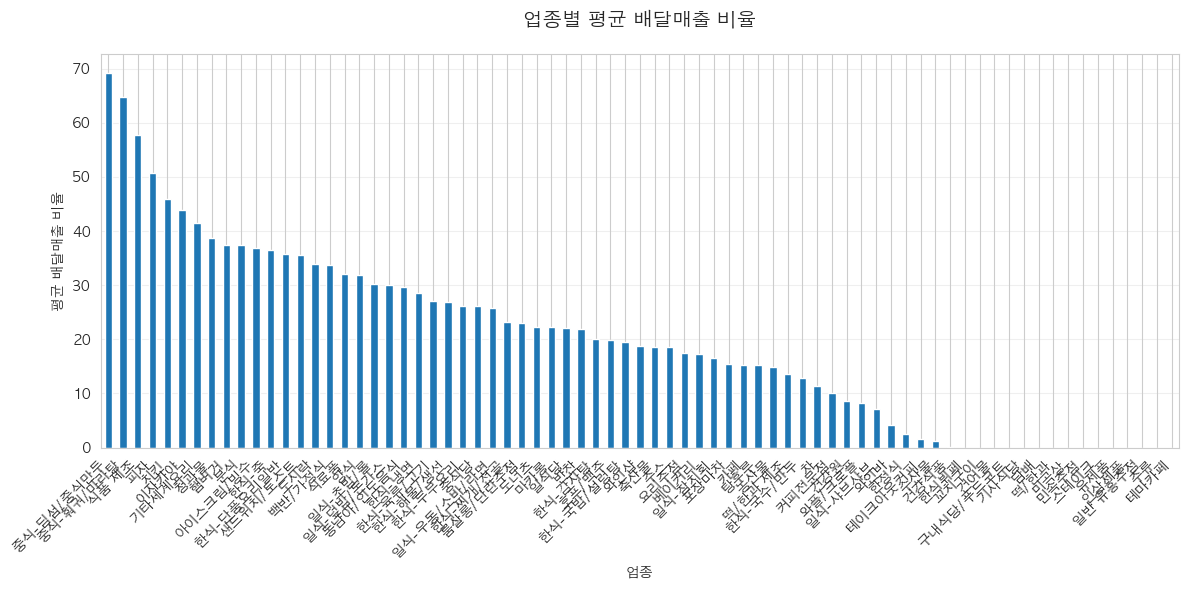

In [83]:
# 업종별 배달매출 비율 시각화
plt.figure(figsize=(12, 6))
industry_stats['DLV_SAA_RAT'].sort_values(ascending=False).plot(kind='bar')
plt.title('업종별 평균 배달매출 비율', fontsize=14, pad=20)
plt.xlabel('업종')
plt.ylabel('평균 배달매출 비율')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 6. 요약 및 주요 발견사항

In [84]:
print("=" * 80)
print("주요 발견사항 요약")
print("=" * 80)

print("\n1. 데이터 규모:")
print(f"   - 총 가맹점 수: {len(mct_df1):,}개")
print(f"   - 분석 기간: 2023년 01월 ~ 2024년 12월 (24개월)")
print(f"   - 월별 데이터 건수: {len(df2):,}건")

print("\n2. 가맹점 현황:")
print(f"   - 운영중: {df1['MCT_ME_D'].isna().sum():,}개")
print(f"   - 폐업: {df1['MCT_ME_D'].notna().sum():,}개")
print(f"   - 업종 수: {df1['HPSN_MCT_ZCD_NM'].nunique()}개")
print(f"   - 상권 수: {df1['HPSN_MCT_BZN_CD_NM'].nunique()}개")

print("\n3. 데이터 품질:")
print(f"   - Dataset 2, 3의 가맹점 일치 여부: {mct_df2 == mct_df3}")
print(f"   - 고객정보 유효 데이터 비율: {len(df3_valid)/len(df3)*100:.2f}%")

print("\n4. 주요 특징:")
print(f"   - 배달매출 있는 가맹점: {(df2['DLV_SAA_RAT'] != -999999.9).sum():,}건")
print(f"   - 평균 재방문 고객 비중: {df3_customer_type['MCT_UE_CLN_REU_RAT'].mean():.2f}%")
print(f"   - 평균 신규 고객 비중: {df3_customer_type['MCT_UE_CLN_NEW_RAT'].mean():.2f}%")

print("\n=" * 80)

주요 발견사항 요약

1. 데이터 규모:
   - 총 가맹점 수: 4,185개
   - 분석 기간: 2023년 01월 ~ 2024년 12월 (24개월)
   - 월별 데이터 건수: 86,590건

2. 가맹점 현황:
   - 운영중: 4,058개
   - 폐업: 127개
   - 업종 수: 73개
   - 상권 수: 21개

3. 데이터 품질:
   - Dataset 2, 3의 가맹점 일치 여부: True
   - 고객정보 유효 데이터 비율: 97.69%

4. 주요 특징:
   - 배달매출 있는 가맹점: 29,245건
   - 평균 재방문 고객 비중: 25.34%
   - 평균 신규 고객 비중: 9.83%

=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
